### Light Reactions

2 H$_2$O + 8 $\gamma$ + 2 NADP + 3 ADP + 3 P$_i$ $\rightarrow$ O$_2$ + 3 ATP + 2 NADPH

### Dark Reactions

6 CO$_2$ + 6 H$_2$O + 6 RuBP + 12 ATP $\rightarrow$ 12 1,3-BPG + 12 ADP

12 1,3-BGP + 12 NADPH $\rightarrow$ 12 NADP + 12 G3P + 12 P$_i$

5 G3P $\rightarrow$ 5 DHAP

3 G3P + 3 DHAP $\rightarrow$ 3 FBP

3 FBP + 3 H$_2$O $\rightarrow$ 3 F6P + 3 P$_i$

1 F6P $\rightarrow$ 1 G6P

1 G6P + 1 H$_2$O $\rightarrow$ 1 Glucose + 1 P$_i$

2 F6P + 2 G3P $\rightarrow$ 2 Xu5P + 2 E4P

2 E4P + 2 DHAP $\rightarrow$ 2 SBP

2 SBP + 2 H$_2$O + 2 G3P $\rightarrow$ 4 Ru5P + 2 P$_i$

6 Ru5P + 6 ATP $\rightarrow$ 6 RuBP + 6 ADP


#### Net

6 CO$_2$ + 18 ATP + 12 NADPH + 12 H + 12 H$_2$O $\rightarrow$ 1 Glucose + 18 ADP + 18 P$_i$ + 12 NADP

### Simple Model

2 H$_2$O + 8 $\gamma$ + 2 NADP + 3 ADP + 3 P$_i$ $\xrightarrow{k_0}$ O$_2$ + 3 ATP + 2 NADPH  

6 CO$_2$ + 18 ATP + 12 NADPH + 12 H$_2$O $\xrightarrow{k_1}$ 1 Glucose + 18 ADP + 18 P$_i$ + 12 NADP 

$a_0 = k_0\cdot[NADP][ADP][P_i]$

$a_1 = k_1\cdot[CO_2][ATP][NADPH][H]$

$\frac{d[H_2O]}{dt} \approx 0$

$\frac{d[NADP]}{dt} = -2a_0 + 12a_1$

$\frac{d[ADP]}{dt} = -3a_0 + 18a_1$

$\frac{d[P_i]}{dt} = -3a_0 + 18a_1$

$\frac{d[O_2]}{dt} = a_0 -D_1$

$\frac{d[ATP]}{dt} = 3a_0 - 18a_1$

$\frac{d[NADPH]}{dt} = 2a_0 -12a_1$

$\frac{d[CO_2]}{dt} = -6a_1 + D_2$

$\frac{d[Glucose]}{dt} = a_1 - D_4$





Raw Data
--------

[NADP] = 8e-5 M

[ATP] = 1.5 mM

[ADP] = 0.5 mM

[NADPH] = 0.1 mM

[P] = 100 mM

[RuBP] = 0.15 mM

[O2] = 0.3 mM

[CO2] = 0.3 mM

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, HTML
import ipywidgets as ipw
import logging

logging.disable(logging.CRITICAL)


avogadro = 6.022e23

In [81]:
chloroplast_volume = 3.3e-14  # Liters
grana_stack_height = 1.18e-7  # Meters
grana_stack_endcap_area = 1.6e-13 # Square meters
grana_per_chloroplast = 60

height_extension = 1.2  # Increase height by 10% on either end
radius_extension = 1.1  # Increase radius by 10%

single_grana_volume = (1e3 * grana_stack_height *  # Liters 
                       grana_stack_endcap_area) 
grana_volume = grana_per_chloroplast * single_grana_volume  # Liters

single_grana_extended_volume = (1e3 * height_extension *  # Liters
                                grana_stack_height * 
                                radius_extension**2 * 
                                grana_stack_endcap_area)

grana_extended_volume = (grana_per_chloroplast *  # Liters
                         single_grana_extended_volume)

stroma_volume = chloroplast_volume - grana_volume
reaction_volume =  grana_extended_volume - grana_volume
diffusion_volume = stroma_volume - reaction_volume


print("Stroma Volume : {:.3e} Liters".format(stroma_volume))
print("Reaction Volume : {:.3e} Liters".format(reaction_volume))
print("Diffusion Volume : {:.3e} Liters".format(diffusion_volume))

Stroma Volume : 3.187e-14 Liters
Reaction Volume : 5.120e-16 Liters
Diffusion Volume : 3.136e-14 Liters


In [82]:
reactant_map_1 = {"NADP": 0,
                  "ATP": 1,
                  "ADP": 2,
                  "NADPH": 3,                  
                  "O2": 4,
                  "CO2": 5}

reactant_keys = list(reactant_map_1.keys())  # Stays in consistent order

# Moles per liter
reactant_conc_in_stroma = np.array([0.00008,  # NADP
                                    0.0015,   # ATP
                                    0.0005,   # ADP
                                    0.0001,   # NADPH                                    
                                    0.0003,   # O2
                                    0.0003])  # CO2


reactants_in_diffusion_vol = np.int_(diffusion_volume * avogadro *
                                     reactant_conc_in_stroma)
reactants_in_reaction_vol = np.int_(reaction_volume * avogadro * 
                                    reactant_conc_in_stroma)


print("Reactants in Diffusion Volume")
print("=============================")
for reactant in reactant_keys:
    print("Total {} molecules in diffusion volume : {:}".format(
            reactant, 
            reactants_in_diffusion_vol[reactant_map_1[reactant]]))
    
print()
print()

print("Reactants in Reaction Volume")
print("=============================")
for reactant in reactant_keys:
    print("Total {} molecules in reaction volume : {:}".format(
            reactant, 
            reactants_in_reaction_vol[reactant_map_1[reactant]]))
    
    


Reactants in Diffusion Volume
Total ADP molecules in diffusion volume : 9441043
Total CO2 molecules in diffusion volume : 5664625
Total NADP molecules in diffusion volume : 1510566
Total O2 molecules in diffusion volume : 5664625
Total ATP molecules in diffusion volume : 28323129
Total NADPH molecules in diffusion volume : 1888208


Reactants in Reaction Volume
Total ADP molecules in reaction volume : 154170
Total CO2 molecules in reaction volume : 92502
Total NADP molecules in reaction volume : 24667
Total O2 molecules in reaction volume : 92502
Total ATP molecules in reaction volume : 462512
Total NADPH molecules in reaction volume : 30834


In [83]:
      
    
# _d are in the diffusion volume, 
# _r are in the reaction volume
reactant_names = ['CO2_d', 'O2_d', 
                  'ATP_d', 'ADP_d',
                  'NADPH_d', 'NADP_d', 
                  'CO2_r', 'O2_r', 
                  'ATP_r', 'ADP_r', 
                  'NADPH_r', 'NADP_r', 
                  'Glucose']

# Index map of the reactants
reactant_map = {reactant:reactant_names.index(reactant) 
                for reactant in reactant_names}

# For calculating diffusion parameters.
reactant_masses = np.array([44.01,     # CO2_d    
                            32.00,     # O2_d
                            507.18,    # ATP_d
                            427.20,    # ADP_d
                            745.42,    # NADPH_d
                            744.42,    # NADP_d                              
                            44.01,     # CO2_r
                            32.00,     # O2_r
                            507.18,    # ATP_r
                            427.20,    # ADP_r
                            745.42,    # NADPH_r
                            744.42])   # NADP_r
                            

# Starting number of reactants  
reactants = np.array([5664625,     # CO2_d    
                      5664625,     # O2_d
                      28323129,    # ATP_d
                      9441043,     # ADP_d
                      1888208,     # NADPH_d
                      1510566,     # NADP_d                      
                      92502,       # CO2_r
                      92502,       # O2_r
                      462512,      # ATP_r
                      154170,      # ADP_r
                      30834,       # NADPH_r
                      24667,       # NADP_r                      
                      0])          # Glucose


# Specifies which reactants are in each reaction
reactions = np.array([
#                            Dark reaction        
#                        Light reaction  |
#                          NADP diff. |  |  
#                      NADPH diff. |  |  |  
#                     ADP diff. |  |  |  |  
#                  ATP diff. |  |  |  |  |  
#           O2 int. diff. |  |  |  |  |  |  
#       CO2 int. diff. |  |  |  |  |  |  |  
#     O2 ext. diff. |  |  |  |  |  |  |  |      
# CO2 ext. diff. |  |  |  |  |  |  |  |  |      
#             |  |  |  |  |  |  |  |  |  |      
             [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # CO2_d
             [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],  # O2_d
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],  # ATP_d
             [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],  # ADP_d
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # NADPH_d
             [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # NADP_d             
             [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],  # CO2_r
             [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # O2_r
             [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],  # ATP_r
             [0, 0, 0, 0, 0, 1, 0, 0, 1, 0],  # ADP_r
             [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],  # NADPH_r
             [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],  # NADP_r             
             [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) # Glucose

# Specifies the change in the reactants for each reaction
state_change = np.array([
#                                             Dark reaction        
#                                        Light reaction   |
#                                        NADP diff.   |   |
#                                  NADPH diff.   |    |   |
#                               ADP diff.   |    |    |   |
#                          ATP diff.   |    |    |    |   |
#                 O2 int. diff.   |    |    |    |    |   |
#           CO2 int. diff.   |    |    |    |    |    |   |
#       O2 ext. diff.   |    |    |    |    |    |    |   |
# CO2 ext. diff. __|  __|  __|  __|  __|  __|  __|  __| __|
#          |    |    |    |    |    |    |    |    |   |   
        [100,   0, 100,   0,   0,   0,   0,   0,   0,   0],  # CO2_d
        [  0, 100,   0, 100,   0,   0,   0,   0,   0,   0],  # O2_d
        [  0,   0,   0,   0, 100,   0,   0,   0,   0,   0],  # ATP_d
        [  0,   0,   0,   0,   0, 100,   0,   0,   0,   0],  # ADP_d
        [  0,   0,   0,   0,   0,   0, 100,   0,   0,   0],  # NADPH_d
        [  0,   0,   0,   0,   0,   0,   0, 100,   0,   0],  # NADP_d        
        [  0,   0,-100,   0,   0,   0,   0,   0,   0,  -6],  # CO2_r
        [  0,   0,   0,-100,   0,   0,   0,   0,   1,   0],  # O2_r
        [  0,   0,   0,   0,-100,   0,   0,   0,   3, -18],  # ATP_r
        [  0,   0,   0,   0,   0,-100,   0,   0,  -3,  18],  # ADP_r
        [  0,   0,   0,   0,   0,   0,-100,   0,   2, -12],  # NADPH_r
        [  0,   0,   0,   0,   0,   0,   0,-100,  -2,  12],  # NADP_r        
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1]]) # Glucose

# Keys are the columns of the reaction and 
# state change matrices
reaction_map = {0:  "DM", # CO2 Membrane diffusion
                1:  "DM", # O2 Membrane diffusion
                2:  "DI", # CO2 internal diffusion
                3:  "DI", # O2 internal diffusion
                4:  "DI", # ATP diffusion
                5:  "DI", # ADP diffusion
                6:  "DI", # NADPH diffusion
                7:  "DI", # NADP diffusion                
                8:  "R", # Light reaction
                9:  "R"} # Dark reaction  

In [112]:
class Model(object):    
    
    def __init__(self,                 
                 reactant_names,
                 reactant_map,
                 reactant_masses,
                 reactants,
                 reactions,
                 state_change,
                 reaction_map,
                 reaction_volume,
                 diffusion_volume):        
        self.reactant_names = reactant_names
        self.reactant_map = reactant_map
        self.reactant_masses = np.sqrt(reactant_masses)
        self.reactants = reactants
        self.reactions = reactions
        self.state_change = state_change
        self.reaction_map = reaction_map
        self.rvd = 1/(reaction_volume*avogadro)
        self.dvd = 1/(diffusion_volume*avogadro)
        self.log = []
        
    def get_reactants(self):
        return self.reactants.copy()
    
    def update_reactants(self, reaction, sgn):   
        self.log.append(reaction)
        self.reactants += sgn*self.state_change[:,reaction]
    
     

class Simulator(object):
    
    def __init__(self, model, params, callback):
        self.model = model
        self.params = params
        self.callback = callback
        
    def run(self, t):
        T = [t]
        R = [self.model.get_reactants()]
        
        while T[-1] < self.params['time'] + t:            
            
            rates, sgn = self.calc_rates()
            #print(rates)
            tau, r = self.calculate_update(rates)
            reaction = self.get_reaction(rates, r)   
            
            self.model.update_reactants(reaction, sgn[reaction])
            
            T.append(T[-1] + tau)
            #print("Tau : {}".format(tau))
            self.callback(tau)            
            R.append(self.model.get_reactants())
        
        return T, R
    
    def calc_rates(self):
        conc = np.float_(self.model.get_reactants())   
        conc[:6] = conc[:6]*self.model.rvd
        conc[6:] = conc[6:]*self.model.dvd
        a = np.zeros(len(self.model.reaction_map))
        sgn = np.zeros(len(self.model.reaction_map), dtype = int)
        
        for i in range(len(a)):
            if self.model.reaction_map[i] == 'DM':
                a[i], sgn[i] = self.calc_membrane_diffusion_rate(
                    i, conc[i])
            elif self.model.reaction_map[i] == 'DI':                
                a[i], sgn[i] = self.calc_internal_diffusion_rate(
                    i, conc[i-2], conc[i+4])
            else:
                a[i], sgn[i] = self.calc_reaction_rate(i, conc), 1
                
        return a, sgn
    
    def calc_membrane_diffusion_rate(self, i, c):
        K = self.params['K_m']
        T = np.sqrt(self.params['temp'])        
        g_c = [self.params['co2_conc'], self.params['o2_conc']]
        d = g_c[i] - c
        
        return K*T/reactant_masses[i]*np.abs(d), int(-np.sign(d))
        
        
    
    def calc_internal_diffusion_rate(self, i, c1, c2):
        K = self.params['K_r']
        T = np.sqrt(self.params['temp'])
        
        d = c1 - c2
        
        return K*T/reactant_masses[i]*np.abs(d), int(-np.sign(d))
        
        
    def calc_reaction_rate(self, i, c):
        k = self.params['k_l'] if i == 8 else self.params['k_d']
        r = c*self.model.reactions[:, i]
        r = r[r.nonzero()]
        return k**len(r)*np.product(r)
        
        
        
        
    @staticmethod
    def calculate_update(rates):
        total_rate = np.sum(rates)
        
        tau = -1/total_rate*np.log(np.random.random())
        r = total_rate*np.random.random()
        
        return tau, r
    
    @staticmethod
    def get_reaction(rates, r):        
        
        current = 0    
        for i in range(len(rates)):
            current += rates[i]
            if current > r:                
                break            
        return i
        
    
            
            
            
        

In [146]:
####################
# Model Parameters #
####################

# Simulate how many seconds?
max_time = ipw.IntSlider(min=     100, 
                         max=     100000000,
                         step=    100,
                         value=   1000,
                         continuous_update=False)

# External gas Concentrations (Moles/Liter)
ext_o2_conc = ipw.FloatSlider(min=   0.00001, 
                              max=   0.00100,
                              step=  0.00001,
                              value= 0.00030,
                              continuous_update=False)
ext_co2_conc = ipw.FloatSlider(min=   0.00001, 
                               max=   0.00100,
                               step=  0.00001,
                               value= 0.00030,
                               continuous_update=False)
# System Temperature (Kelvin)
temperature = ipw.IntSlider(min=   273, 
                            max=   320,
                            step=    1,
                            value= 305,
                            continuous_update=False)


# Diffusion Parameters

# Cell Membrane 
memb_diff = ipw.FloatSlider(min=   0.0001, 
                            max=   0.1,
                            step=  0.0001,
                            value= 0,
                            continuous_update=False)

# Reaction Compartment 
int_diff = ipw.FloatSlider(min=   0.001, 
                           max=   0.1,
                           step=  0.001,
                           value= 0,
                           continuous_update=False)


# Reaction Rates
light_rate = ipw.FloatSlider(min=    10, 
                             max=    10000,
                             step=   10,
                             value=  10,
                             continuous_update=False)

dark_rate = ipw.FloatSlider(min=     10, 
                             max=    10000,
                             step=   10,
                             value=  10,
                             continuous_update=False)


In [150]:
def plot_the_plots(T, R):    
    reacs = ['CO2_r', 'O2_r', 'ATP_r', 'ADP_r',
             'NADPH_r', 'NADP_r', 'Glucose']
    names = ['Carbon Dioxide',
             'Oxygen',
             'ATP',
             'ADP',
             'NADPH',
             'NADP',             
             'Glucose']
    
    R = R/(reaction_volume*avogadro)
    
    fig, ax = plt.subplots(len(names), 1, figsize=(12, 35))
    
    for i in range(len(reacs)):       
        
        ax[i].plot(T, R[:, reactant_map[reacs[i]]], lw=4)
        ax[i].set_xlabel('Time', fontsize=15)
        ax[i].set_ylabel('{} Concentration [M]'.format(names[i]),
                        fontsize=15)
    
    plt.show();
    


In [151]:
r = reactants.copy()
R = []
T = []

Counter({8: 41321, 9: 6331, 7: 258, 4: 229, 6: 206, 1: 88, 3: 78, 0: 75, 2: 74, 5: 69})
48729
[ 5668425  5670125 28256429  9416043  1815108  1432066    62582   114306
   383064   325318     6502   200599     8120]
[ 5668525  5671125 28233529  9409143  1794508  1406266    31996   163427
   415969   322213    33772   219729    14451]


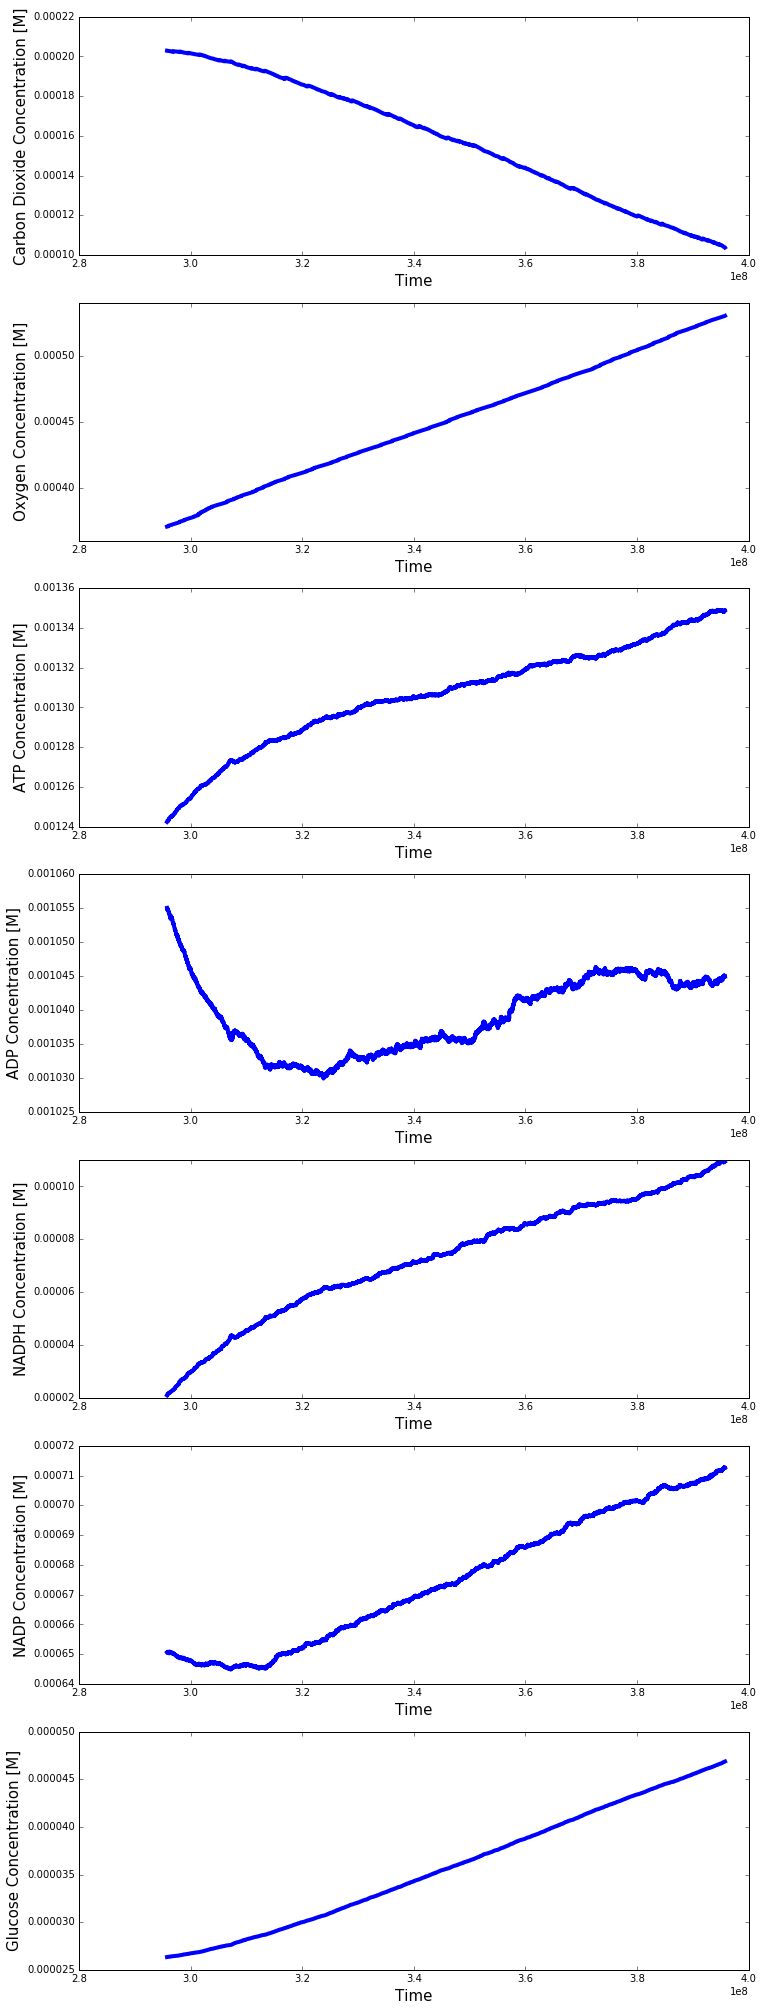

In [155]:
progress_bar = ipw.FloatProgress(min=0, max=max_time.value)
display(progress_bar)
def update_callback(dt):
    progress_bar.value += dt


@ipw.interact(max_time=max_time, 
              ext_o2_conc=ext_o2_conc,
              ext_co2_conc=ext_co2_conc,
              temperature=temperature,
              memb_diff=memb_diff,
              int_diff=int_diff,
              light_rate=light_rate,
              dark_rate=dark_rate,
              __manual=True)
def f(max_time, ext_o2_conc, ext_co2_conc, 
      temperature, memb_diff, int_diff,
      light_rate, dark_rate):
    
    progress_bar.min=0
    progress_bar.max=max_time
    progress_bar.value=0
    
    params = {'time': max_time, 
              'o2_conc': ext_o2_conc, 
              'co2_conc': ext_co2_conc, 
              'temp': temperature, 
              'K_m': memb_diff, 
              'K_r': int_diff,
              'k_l': light_rate, 
              'k_d': dark_rate}
    
    m = Model(reactant_names,
              reactant_map,
              reactant_masses,
              r,
              reactions,
              state_change,
              reaction_map,
              reaction_volume, 
              diffusion_volume)
    
    
    
    s = Simulator(m, params, update_callback)
    if T:
        T_run, R_run = s.run(T[-1])
    else:
        T_run, R_run = s.run(0)
    
    T.extend(T_run)
    R.extend(R_run)
    c = Counter(m.log)
    print(c)
    print(np.sum([v for k, v in c.items()]))
    print(R_run[0, :])
    print(R_run[-1,:])
    
    plot_the_plots(np.array(T_run), np.array(R_run))

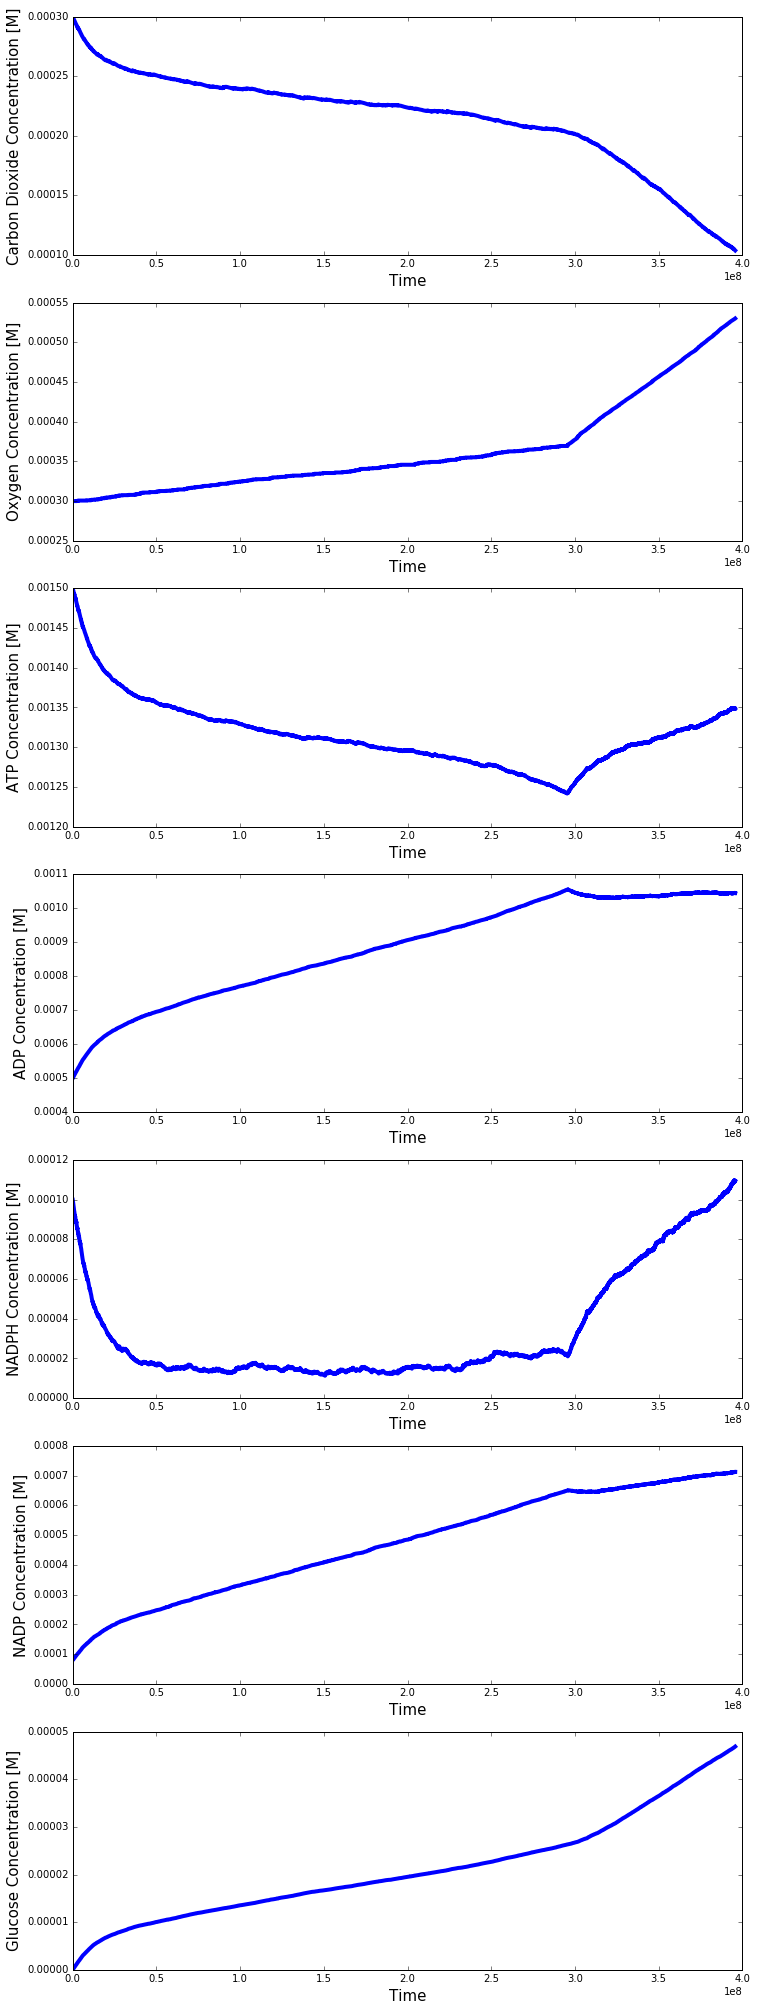

In [158]:

plot_the_plots(np.array(T), np.array(R))